In [89]:
import pandas as pd 
import matplotlib.pyplot as plt

In [90]:
df = pd.read_json('logins.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [91]:
df[:4]

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36


In [92]:
df['num']=1
df['times']=df['login_time']
df = df.set_index('login_time')


In [93]:
counts = df.groupby(pd.Grouper(freq='15min')).num.sum()


In [94]:
c = pd.DataFrame(counts)


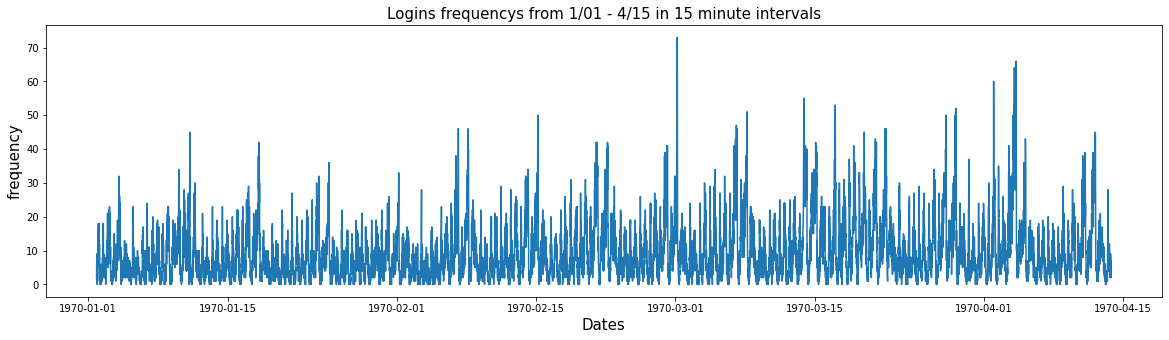

In [95]:
fig, ax = plt.subplots(figsize=(20,5))
ax = plt.plot(c )
plt.title('Logins frequencys from 1/01 - 4/15 in 15 minute intervals', size=15)
plt.ylabel('frequency', size=15)
plt.xlabel('Dates', size=15)
plt.show()



## clear cylcic pattern seen in login

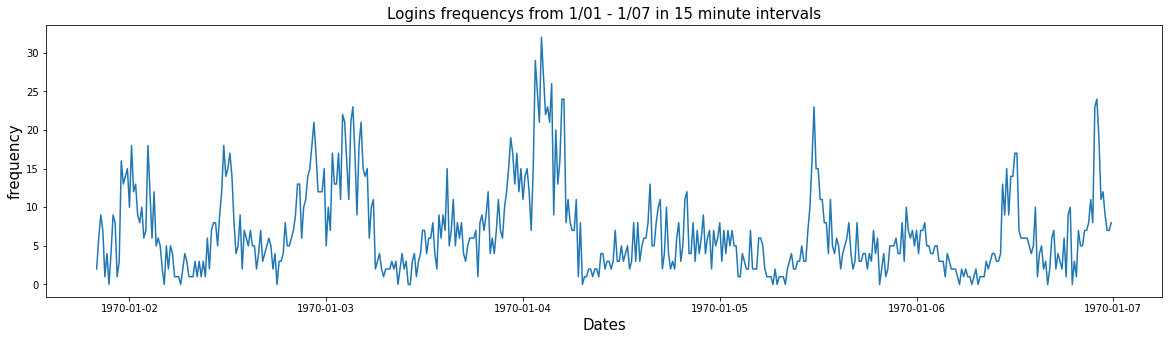

In [96]:
week = df[df['times'] < '1970-01-07' ]
w = week.groupby(pd.Grouper(freq=('15min'))).num.sum()
fig, ax = plt.subplots(figsize=(20,5))
ax = plt.plot(w)
plt.title('Logins frequencys from 1/01 - 1/07 in 15 minute intervals', size=15)
plt.ylabel('frequency', size=15)
plt.xlabel('Dates', size=15)
plt.show()

### Looking at first week looks like midnight and noon of each day has a spike in logins

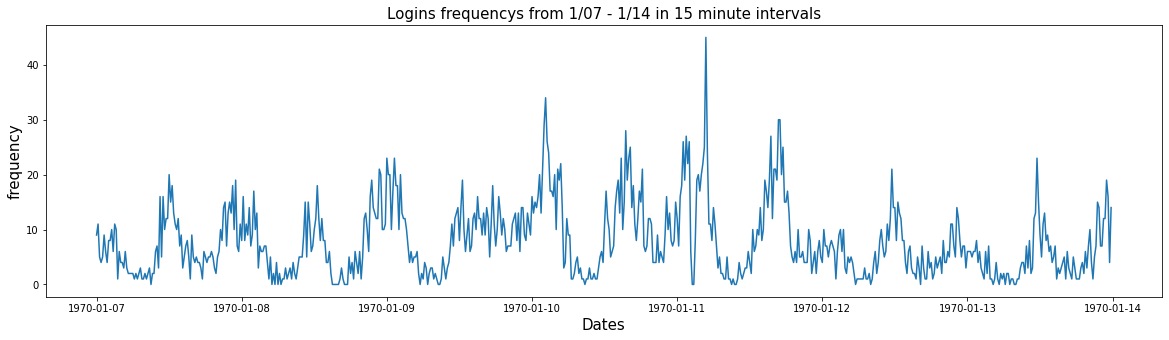

In [97]:
week = df[(df['times'] > '1970-01-07')&(df['times'] < '1970-01-14' )]
w = week.groupby(pd.Grouper(freq=('15min'))).num.sum()
fig, ax = plt.subplots(figsize=(20,5))
ax = plt.plot(w)
plt.title('Logins frequencys from 1/07 - 1/14 in 15 minute intervals', size=15)
plt.ylabel('frequency', size=15)
plt.xlabel('Dates', size=15)
plt.show()

### Second week has same patern 

# Insight
## Each day there are is usually a spike in logins around midnight, there is also a spike around noon for most days as well. 
## This could possibly show a week day to weekend pattern. 

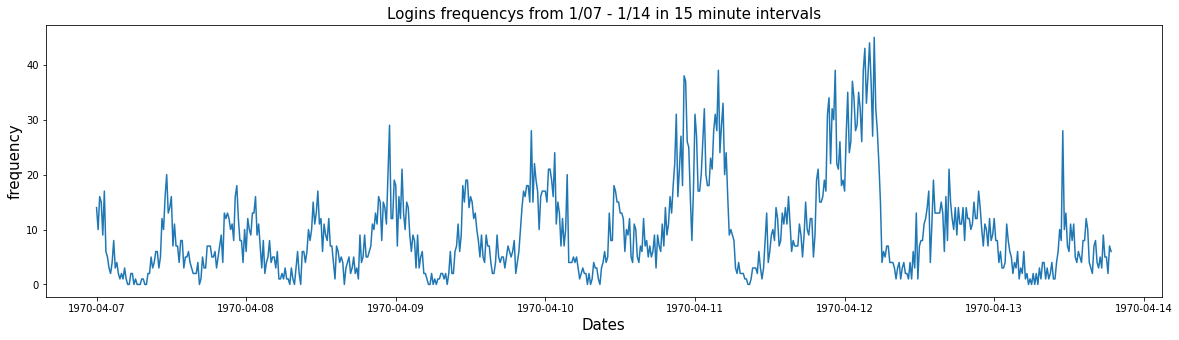

In [100]:
week = df[(df['times'] > '1970-04-07')]
w = week.groupby(pd.Grouper(freq=('15min'))).num.sum()
fig, ax = plt.subplots(figsize=(20,5))
ax = plt.plot(w)
plt.title('Logins frequencys from 1/07 - 1/14 in 15 minute intervals', size=15)
plt.ylabel('frequency', size=15)
plt.xlabel('Dates', size=15)
plt.show()

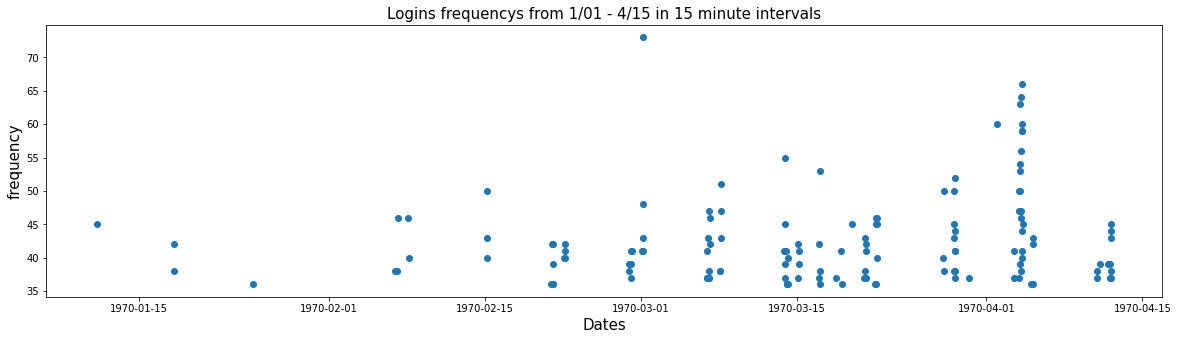

In [63]:
big = c[c.num > 35]
fig, ax = plt.subplots(figsize=(20,5))
ax = plt.scatter(x=big.index,y=big.num)
plt.title('Logins frequencys from 1/01 - 4/15 in 15 minute intervals', size=15)
plt.ylabel('frequency', size=15)
plt.xlabel('Dates', size=15)

plt.show()



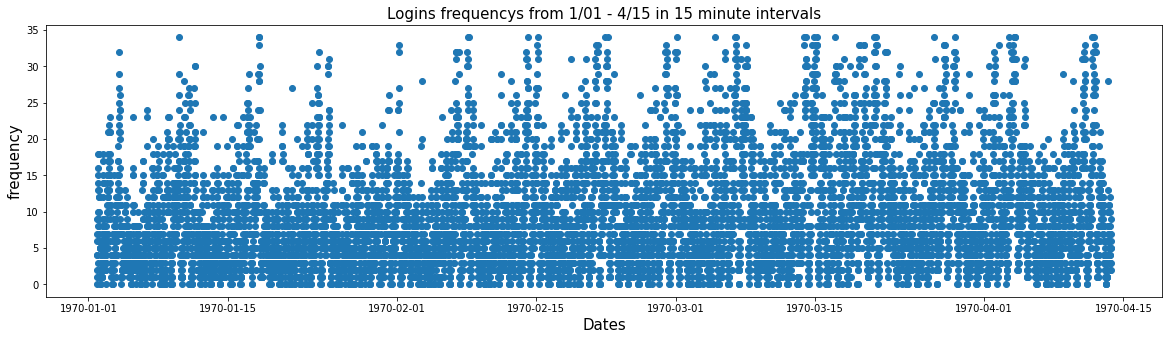

In [64]:
small= c[c.num < 35]
fig, ax = plt.subplots(figsize=(20,5))
ax = plt.scatter(x=small.index,y=small.num)
plt.title('Logins frequencys  below 35 per 15 min window from 1/01 - 4/15 in 15 minute intervals', size=15)
plt.ylabel('frequency', size=15)
plt.xlabel('Dates', size=15)

plt.show()

In [98]:
counts = df.groupby(pd.Grouper(freq='D')).num.sum()

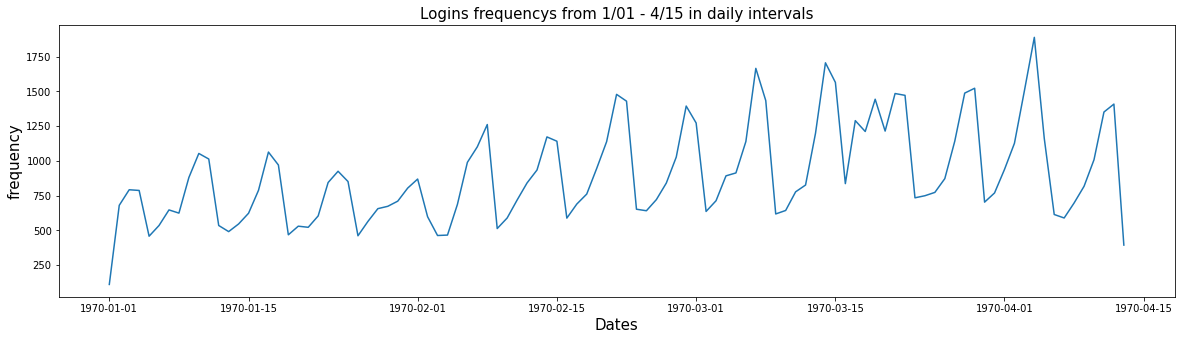

In [99]:
counts = df.groupby(pd.Grouper(freq='D')).num.sum()

fig, ax = plt.subplots(figsize=(20,5))
ax = plt.plot(counts )
plt.title('Logins frequencys from 1/01 - 4/15 in daily intervals', size=15)
plt.ylabel('frequency', size=15)
plt.xlabel('Dates', size=15)
plt.show()

In [72]:
df.isna().sum()

num      0
times    0
dtype: int64